In [1]:
from pandas import DataFrame, DatetimeIndex, read_csv, to_datetime
from datetime import timedelta
import numpy as np
import altair as alt
import pandas as  pd
alt.data_transformers.disable_max_rows()
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
df_impfung=pd.read_csv("https://raw.githubusercontent.com/robert-koch-institut/COVID-19-Impfungen_in_Deutschland/master/Aktuell_Deutschland_Landkreise_COVID-19-Impfungen.csv")
df_impfung['Impfdatum'] =pd.to_datetime(df_impfung['Impfdatum'], format='%Y-%m-%d')
df_impfung

/home/thomas/Dokumente/Projekte/ProgrammierProjekte/datavis/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Impfdatum,LandkreisId_Impfort,Altersgruppe,Impfschutz,Anzahl
0,2020-12-27,1003,18-59,1,9
1,2020-12-27,1003,60+,1,19
2,2020-12-27,1053,18-59,1,13
3,2020-12-27,1053,60+,1,200
4,2020-12-27,1055,18-59,1,20
...,...,...,...,...,...
403939,2021-09-13,16077,18-59,2,20
403940,2021-09-13,16077,60+,2,7
403941,2021-09-13,16077,60+,3,11
403942,2021-09-13,17000,18-59,1,23


In [3]:
df_impfung_muenster=df_impfung.loc[df_impfung['LandkreisId_Impfort'].isin(['05515'])]
df_impfung_muenster

,Impfdatum,LandkreisId_Impfort,Altersgruppe,Impfschutz,Anzahl
132747,2021-05-01,05515,12-17,1,14
132748,2021-05-01,05515,18-59,1,1299
132749,2021-05-01,05515,18-59,2,147
132750,2021-05-01,05515,60+,1,253
132751,2021-05-01,05515,60+,2,330
...,...,...,...,...,...
393166,2021-09-09,05515,18-59,2,235
393167,2021-09-09,05515,18-59,3,36
393168,2021-09-09,05515,60+,1,23
393169,2021-09-09,05515,60+,2,26


In [4]:
einwohnerzahlMuenster=316403

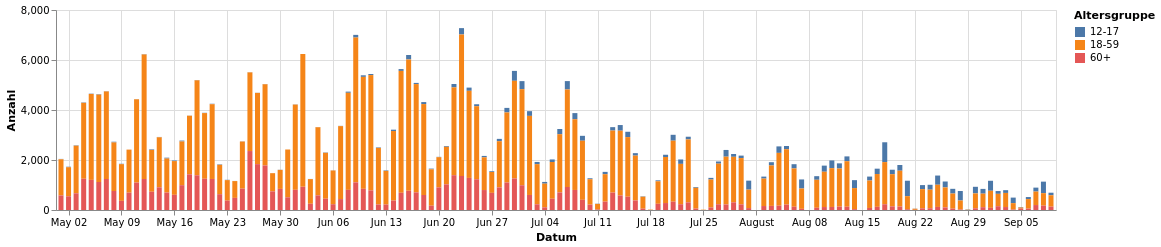

In [5]:
alt.Chart(df_impfung_muenster).mark_bar().encode(
    x=alt.X('Impfdatum:T', title='Datum'),
    y=alt.Y('sum(Anzahl)',title='Anzahl'),
    color='Altersgruppe:N'
).properties(width=1000)

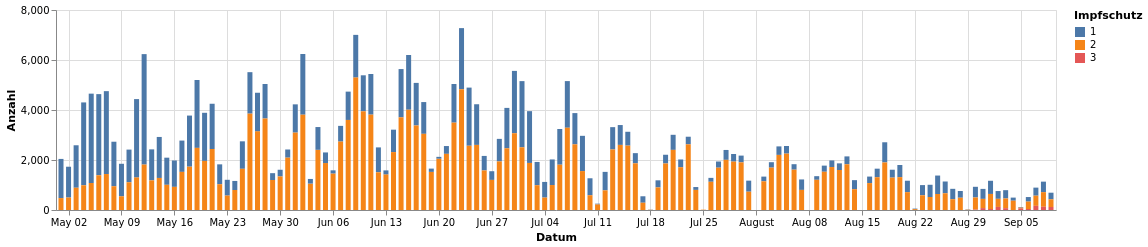

In [6]:
alt.Chart(df_impfung_muenster).mark_bar().encode(
    x=alt.X('Impfdatum', title='Datum'),
    y=alt.Y('sum(Anzahl)',title='Anzahl'),
    color='Impfschutz:N'
).properties(width=1000)

In [7]:
#Größen der Altersgruppen nach https://www-genesis.destatis.de
df_Münster_Anteilig=pd.DataFrame({'Altersgruppen': ['Gesamtbevölkerung',
                                                   '12-17',
                                                    '18-59',
                                                    '60+'
                                                   ],
                                            'Erste Dosis Absolut':[
                                                df_impfung_muenster.loc[df_impfung_muenster['Impfschutz'] == 1, 'Anzahl'].sum(),
                                                df_impfung_muenster.loc[(df_impfung_muenster['Impfschutz'] == 1) & (df_impfung_muenster['Altersgruppe'] == '12-17') , 'Anzahl'].sum(),
                                                df_impfung_muenster.loc[(df_impfung_muenster['Impfschutz'] == 1) & (df_impfung_muenster['Altersgruppe'] == '18-59') , 'Anzahl'].sum(),
                                                df_impfung_muenster.loc[(df_impfung_muenster['Impfschutz'] == 1) & (df_impfung_muenster['Altersgruppe'] == '60+') , 'Anzahl'].sum(),
                                              ],
                                            'Erste Dosis Anteilig':[
                                                df_impfung_muenster.loc[df_impfung_muenster['Impfschutz'] == 1, 'Anzahl'].sum()/einwohnerzahlMuenster*100,
                                                df_impfung_muenster.loc[(df_impfung_muenster['Impfschutz'] == 1) & (df_impfung_muenster['Altersgruppe'] == '12-17') , 'Anzahl'].sum()/14941*100,
                                                df_impfung_muenster.loc[(df_impfung_muenster['Impfschutz'] == 1) & (df_impfung_muenster['Altersgruppe'] == '18-59') , 'Anzahl'].sum()/164726*100,
                                                df_impfung_muenster.loc[(df_impfung_muenster['Impfschutz'] == 1) & (df_impfung_muenster['Altersgruppe'] == '60+') , 'Anzahl'].sum()/73802*100,
                                            ],
                                            'Zweite Dosis Absolut':[
                                                df_impfung_muenster.loc[df_impfung_muenster['Impfschutz'] == 2, 'Anzahl'].sum(),
                                                df_impfung_muenster.loc[(df_impfung_muenster['Impfschutz'] == 2) & (df_impfung_muenster['Altersgruppe'] == '12-17') , 'Anzahl'].sum(),
                                                df_impfung_muenster.loc[(df_impfung_muenster['Impfschutz'] == 2) & (df_impfung_muenster['Altersgruppe'] == '18-59') , 'Anzahl'].sum(),
                                                df_impfung_muenster.loc[(df_impfung_muenster['Impfschutz'] == 2) & (df_impfung_muenster['Altersgruppe'] == '60+') , 'Anzahl'].sum(),
                                            ],
                                            'Zweite Dosis Anteilig':[
                                            df_impfung_muenster.loc[df_impfung_muenster['Impfschutz'] == 2, 'Anzahl'].sum()/einwohnerzahlMuenster*100,
                                                df_impfung_muenster.loc[(df_impfung_muenster['Impfschutz'] == 2) & (df_impfung_muenster['Altersgruppe'] == '12-17') , 'Anzahl'].sum()/14941*100,
                                                df_impfung_muenster.loc[(df_impfung_muenster['Impfschutz'] == 2) & (df_impfung_muenster['Altersgruppe'] == '18-59') , 'Anzahl'].sum()/164726*100,
                                                df_impfung_muenster.loc[(df_impfung_muenster['Impfschutz'] == 2) & (df_impfung_muenster['Altersgruppe'] == '60+') , 'Anzahl'].sum()/73802*100,
                                            ],
                                             'Dritte Dosis Absolut':[
                                                df_impfung_muenster.loc[df_impfung_muenster['Impfschutz'] == 3, 'Anzahl'].sum(),
                                                df_impfung_muenster.loc[(df_impfung_muenster['Impfschutz'] == 3) & (df_impfung_muenster['Altersgruppe'] == '12-17') , 'Anzahl'].sum(),
                                                df_impfung_muenster.loc[(df_impfung_muenster['Impfschutz'] == 3) & (df_impfung_muenster['Altersgruppe'] == '18-59') , 'Anzahl'].sum(),
                                                df_impfung_muenster.loc[(df_impfung_muenster['Impfschutz'] == 3) & (df_impfung_muenster['Altersgruppe'] == '60+') , 'Anzahl'].sum(),
                                            ],
                                            'Dritte Dosis Anteilig':[
                                            df_impfung_muenster.loc[df_impfung_muenster['Impfschutz'] == 3, 'Anzahl'].sum()/einwohnerzahlMuenster*100,
                                                df_impfung_muenster.loc[(df_impfung_muenster['Impfschutz'] == 3) & (df_impfung_muenster['Altersgruppe'] == '12-17') , 'Anzahl'].sum()/14941*100,
                                                df_impfung_muenster.loc[(df_impfung_muenster['Impfschutz'] == 3) & (df_impfung_muenster['Altersgruppe'] == '18-59') , 'Anzahl'].sum()/164726*100,
                                                df_impfung_muenster.loc[(df_impfung_muenster['Impfschutz'] == 3) & (df_impfung_muenster['Altersgruppe'] == '60+') , 'Anzahl'].sum()/73802*100,
                                            ]})
df_Münster_Anteilig

,Altersgruppen,Erste Dosis Absolut,Erste Dosis Anteilig,Zweite Dosis Absolut,Zweite Dosis Anteilig,Dritte Dosis Absolut,Dritte Dosis Anteilig
0,Gesamtbevölkerung,121737,38.475299,209373,66.172887,848,0.268013
1,12-17,8978,60.089686,6312,42.246168,0,0.000000
2,18-59,99433,60.362663,149138,90.537013,182,0.110487
3,60+,13326,18.056421,53923,73.064416,666,0.902415


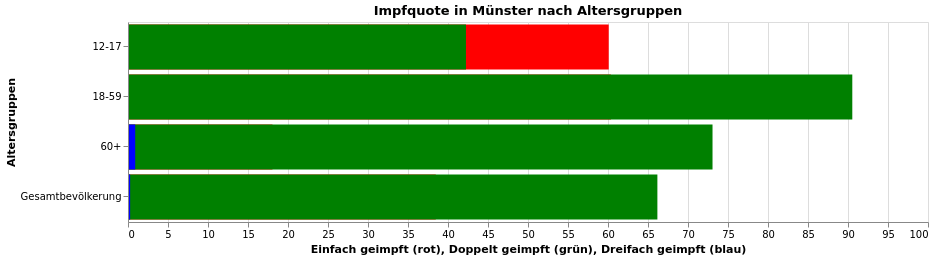

In [10]:
erst=alt.Chart(df_Münster_Anteilig).mark_bar(color='red').encode(
    alt.X('Erste Dosis Anteilig', title='Einfach geimpft (rot)',scale=alt.Scale(domain=[0,100])),
    y="Altersgruppen:O",
    tooltip=['Erste Dosis Anteilig']
)
zweit=alt.Chart(df_Münster_Anteilig).mark_bar(color='green').encode(
    #x='Zweite Dosis Anteilig',
    alt.X('Zweite Dosis Anteilig', title='Doppelt geimpft (grün)'),
    y="Altersgruppen:O",
    tooltip=['Zweite Dosis Anteilig']    
)
drei=alt.Chart(df_Münster_Anteilig).mark_bar(color='blue').encode(
    #x='Zweite Dosis Anteilig',
    alt.X('Dritte Dosis Anteilig', title='Dreifach geimpft (blau)'),
    y="Altersgruppen:O",
    tooltip=['Dritte Dosis Anteilig']
)
final=(erst + zweit+drei).properties(
    title={
    'text':'Impfquote in Münster nach Altersgruppen',
    'subtitle':['Datenqul',]
          }, width=800,height=200)
#final.encode(X('Erste Dosis Anteilig', scale=Scale(domain=[0, 100])))
final.save('ImpfQuoteMuenster.html')
final

In [9]:
#So geht es einfacher
df_test=df_impfung_muenster.groupby(["Altersgruppe","Impfschutz"]).sum()
df_test

Anzahl
Altersgruppe Impfschutz        
12-17        1             8978
             2             6312
18-59        1            99433
             2           149138
             3              182
60+          1            13326
             2            53923
             3              666

In [17]:
df_zeit=df_impfung_muenster.groupby(["Impfdatum","Altersgruppe","Impfschutz"]).sum().reset_index()
df_zeit

,Impfdatum,Altersgruppe,Impfschutz,Anzahl
0,2021-05-01,12-17,1,14
1,2021-05-01,18-59,1,1299
2,2021-05-01,18-59,2,147
3,2021-05-01,60+,1,253
4,2021-05-01,60+,2,330
...,...,...,...,...
731,2021-09-09,18-59,2,235
732,2021-09-09,18-59,3,36
733,2021-09-09,60+,1,23
734,2021-09-09,60+,2,26
